# Libs

In [2]:
import pandas as pd
from collections import Counter
from imblearn.over_sampling import RandomOverSampler 
import numpy as np
from keras.preprocessing.sequence import pad_sequences
from keras.models import Model, load_model
from keras.layers import Input, LSTM, Dense, Masking
import matplotlib
import matplotlib.pyplot as plt
from keras.callbacks import ModelCheckpoint
from keras_metrics import KerasMetrics
from keras.optimizers import adam
import keras.backend as K
from sklearn.metrics import f1_score
from scipy.spatial import distance
import pickle
import seaborn as sns
import lib
%load_ext autoreload
%autoreload 2
opt = adam()
sns.set_color_codes()

Using TensorFlow backend.


# Data

In [3]:
corpus = pd.read_csv("Corpus_new_coding/423_verbs_with_classes.csv",index_col="Unnamed: 0")

# Test oversampling in lib

(333, 3) (90, 3)
oversampling
Resampled dataset shape 171

creating resampled dataset
preprocessing validation data
begin training


/disk1/home/svo6059/masters/Bia/MsResearch/WickelfeaturesProject/lib.py:397: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  corpus_train["X"] = corpus_train.v_inf + "&" + corpus_train.v_conj


(335, 3) (88, 3)
oversampling
Resampled dataset shape 171

creating resampled dataset
preprocessing validation data
begin training


/disk1/home/svo6059/masters/Bia/MsResearch/WickelfeaturesProject/lib.py:397: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  corpus_train["X"] = corpus_train.v_inf + "&" + corpus_train.v_conj


(340, 3) (83, 3)
oversampling
Resampled dataset shape 171

creating resampled dataset
preprocessing validation data
begin training


/disk1/home/svo6059/masters/Bia/MsResearch/WickelfeaturesProject/lib.py:397: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  corpus_train["X"] = corpus_train.v_inf + "&" + corpus_train.v_conj


(341, 3) (82, 3)
oversampling
Resampled dataset shape 171

creating resampled dataset
preprocessing validation data
begin training


/disk1/home/svo6059/masters/Bia/MsResearch/WickelfeaturesProject/lib.py:397: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  corpus_train["X"] = corpus_train.v_inf + "&" + corpus_train.v_conj


(343, 3) (80, 3)
oversampling
Resampled dataset shape 172

creating resampled dataset
preprocessing validation data
begin training


/disk1/home/svo6059/masters/Bia/MsResearch/WickelfeaturesProject/lib.py:397: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  corpus_train["X"] = corpus_train.v_inf + "&" + corpus_train.v_conj


CPU times: user 13min 39s, sys: 1min 4s, total: 14min 44s
Wall time: 8min 57s


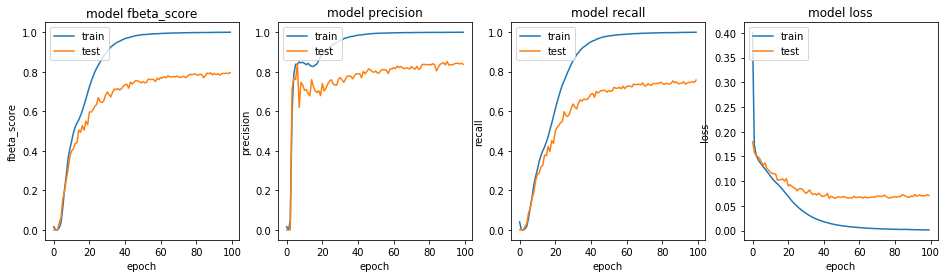

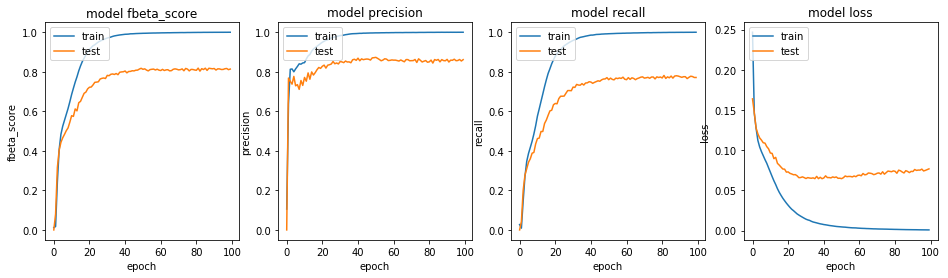

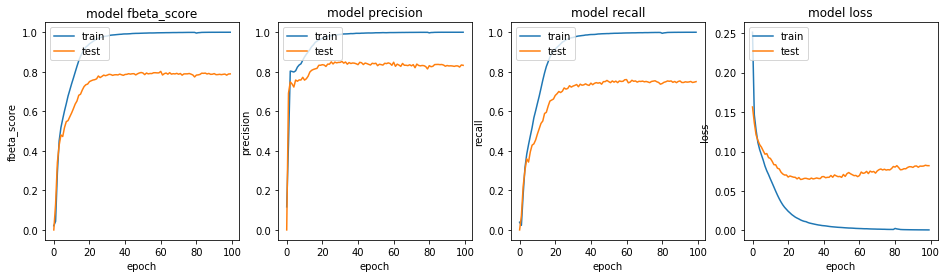

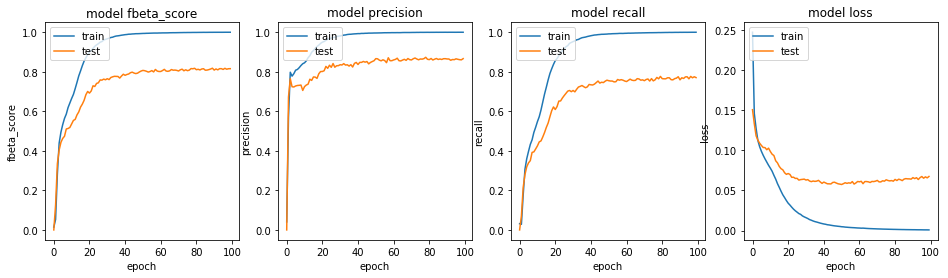

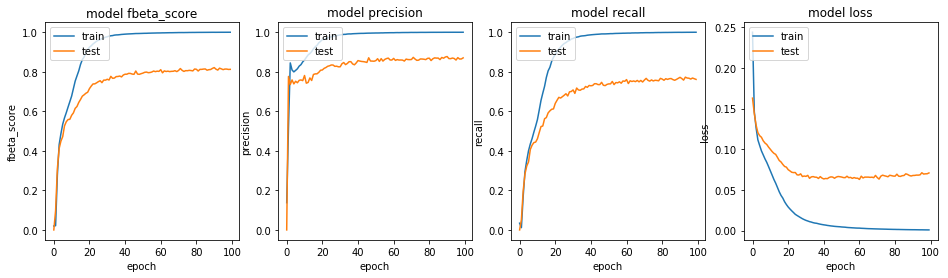

In [107]:
%time all_decodings = lib.kfold(corpus, epochs= 100, oversampling=True, n=5)

In [108]:
all_decodings

,infinitive,predicted,target,class
14,odia,ottu,odeiu,class__ansiar
11,media,manku,medeiu,class__ansiar
11,hemedia,hetediu,hemedeiu,class__ansiar
10,sortea,so$resu,sorteiu,class__ansiar
10,intermedia,intentetiu,intermedeiu,class__ansiar
13,insendia,insenitiu,insendeiu,class__ansiar
12,pleitea,plefiru,pleiteiu,class__ansiar
13,ansia,anse$u,anseiu,class__ansiar
10,pasea,pareiu,paseiu,class__ansiar
18,soka,sOku,sOku,class__botar


In [120]:
all_decodings.to_csv("Files/all_decodings_with_oversampling.csv")

In [109]:
all_decodings = all_decodings.sort_values('class')
all_decodings.to_csv("Files/all_decodings_oversampling.csv", index=None)
all_decodings['correct'] = np.where((all_decodings['predicted'] == all_decodings['target']) , 1, 0)

In [113]:
total_per_class

class
class__ansiar       9
class__botar       30
class__cobrir       7
class__dizer        7
class__fazer       15
class__ler          5
class__mentir       8
class__none        20
class__pedir        7
class__por         27
class__regular    214
class__seguir      27
class__ter         10
class__testar      20
class__ver          6
class__vir         11
Name: v_inf, dtype: int64

In [117]:
proportions = corpus.groupby('class').count().apply(lambda g: round((g / g.sum())*100, 2)).iloc[:,0]

results = pd.concat([all_decodings.groupby('class').sum(), proportions], axis=1)
results.columns = ['correct', 'proportion_in_corpus']
results['total'] = total_per_class
results['accuracy'] = results.correct.divide(total_per_class)
results = results[['correct', 'total', 'accuracy']]
results['accuracy'] = results.accuracy.apply(lambda x: round(x, 2))
results


,correct,total,accuracy
class,,,
class__ansiar,0,9,0.00
class__botar,8,30,0.27
class__cobrir,1,7,0.14
class__dizer,2,7,0.29
class__fazer,3,15,0.20
class__ler,1,5,0.20
class__mentir,3,8,0.38
class__none,0,20,0.00
class__pedir,2,7,0.29


In [119]:
results.correct.sum()/results.total.sum()

0.1702127659574468